In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


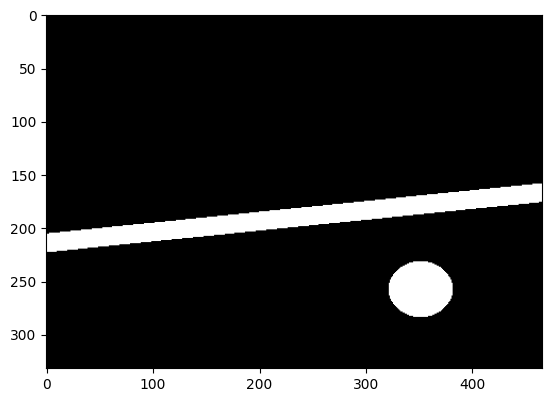

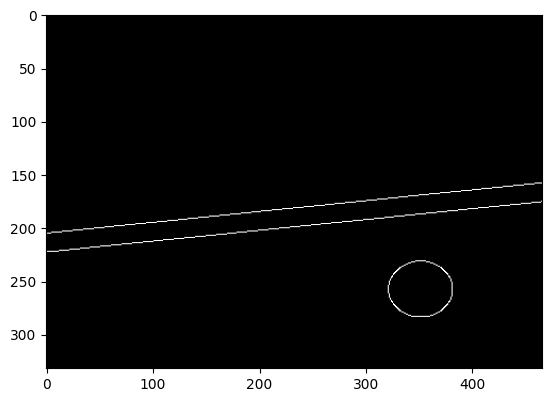

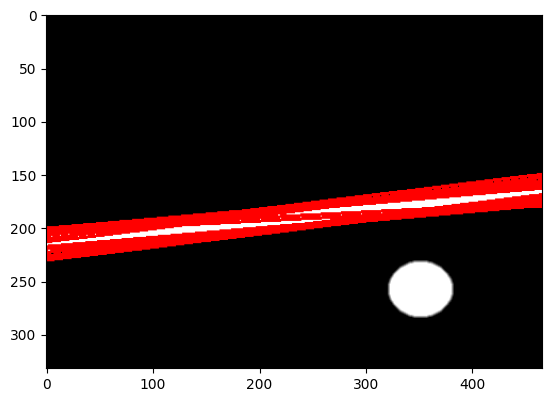

23
227
Point 1: (23, 227)
distance:497.77304065206266


In [16]:
#read images
image1 = cv2.imread('red/red1.png')


#convert to hsv
hsv_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)


#set red boundaries
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])



#exrtact red
extracted1 = cv2.inRange(hsv_image1, lower1, upper1)


new_img1= cv2.cvtColor(extracted1, cv2.COLOR_BGR2RGB)
plt.imshow(new_img1)
plt.show()

#gaussian blur
img1=cv2.GaussianBlur(new_img1,(3,3),100)

#convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#apply one shot filter
canny1 = cv2.Canny(gray1, 10, 10)

#show image
plt.imshow(canny1, cmap='gray')
plt.show()

#Apply hough transform
lines1 = cv2.HoughLines(canny1, 1, np.pi/180, 40)
flag = 0
if lines1 is not None :
    for line in lines1:
        flag = 1
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        #draw line
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        #draw line
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        #draw line
        cv2.line(img1, (x1, y1), (x2, y2), (255, 0, 0), 2)
else:
    print("no line was found")
    
    
if flag == 1:
    plt.imshow(img1)
    plt.show()


    point1 = None
    point2 = None
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0

    def clickFunction(event,x,y,flag,params):
        global point1,point2,var1,var2,var3,var4
        if event == cv2.EVENT_LBUTTONDOWN:
            if point1 is None:
                point1 = (x,y)
                var1=x
                var2=y
                
                print(var1)
                print(var2)
                print(f"Point 1: {point1}")


    cv2.namedWindow('image')
    cv2.setMouseCallback('image',clickFunction)


    while(True):
        newim=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        cv2.imshow('image',newim)
        key = cv2.waitKey(1)
        if key == 27:
            break
    cv2.destroyAllWindows()


    dist= ((var4-var2)**2+(img1.shape[1]-var1)**2)**0.5
    print(f"distance:{dist}")